In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import ShuffleSplit
import os

import sys
sys.path.append("..")
from utils.serialization import save_model, load_model
from utils.monitor import monitor_size_of_dataset

### Dataset

In [2]:
X, y = load_breast_cancer(return_X_y=True)
X.shape

(569, 30)

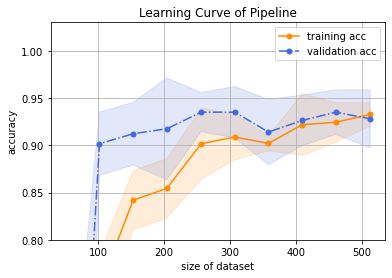

In [3]:
pipe_pla = Pipeline([('pca', PCA()), ('pla', Perceptron())])
ss = ShuffleSplit(n_splits=50, test_size=0.2)
monitor_size_of_dataset(X, y, pipe_pla)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)
X_train.shape

(455, 30)

### Grid Search on PLA

In [5]:
pipe_pla = Pipeline([('pca', PCA()), ('pla', Perceptron())])
param_grid = [
    {
        'pca__n_components': range(1, X_train.shape[1] + 1),
        'pla__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    }
]
gs = GridSearchCV(
    estimator=pipe_pla,
    param_grid=param_grid,
    scoring='accuracy'
)

gs.fit(X_train, y_train)
# print(pd.DataFrame(gs.cv_results_).head(10))
print(f"best_params: {gs.best_params_}\nbest_acc: {gs.best_score_:.4f} %")

best_params: {'pca__n_components': 9, 'pla__alpha': 0.0001}
best_acc: 0.9363 %


### Evaluation

In [6]:
prediction = gs.predict(X_test)
acc = accuracy_score(y_test, prediction)
recall = recall_score(y_test, prediction, average='macro')
precision = precision_score(y_test, prediction, average='macro')
f1 = f1_score(y_test, prediction, average='macro')
print(f"accuracy: {acc * 100:.1f} %")
print(f"recall: {recall * 100:.1f} %")
print(f"precision: {precision * 100:.1f} %")
print(f"f1_score: {f1 * 100:.1f} %")

accuracy: 93.9 %
recall: 91.7 %
precision: 95.6 %
f1_score: 93.1 %


### Save Model

In [7]:
path = os.path.join(os.getcwd(), "trained_models/model_PLA.pickle")
save_model(path, gs)

### Load Model

In [8]:
path = os.path.join(os.getcwd(), "trained_models/model_PLA.pickle")
model = load_model(path)
model.predict(X_test)

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1])